# Preparacion de datos

In [1]:
import pandas as pd

# Cargar los archivos CSV en DataFrames
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  # Casos de Parkinson
df_contaminacion = pd.read_csv("Datos_contaminación_aire.csv")  # Tasa de contaminación
df_calidad_agua = pd.read_csv("Datos_muertes_agua.csv")
df_plomo = pd.read_csv("Datos_exp_plomo.csv")  # Tasa de carga de enfermedad por exposición al plomo
df_pesticidas = pd.read_csv("Datos_uso_pepticidas.csv")  # Uso de pesticidas en toneladas
df_precipitaciones = pd.read_csv("Datos_precipitaciones.csv")  # Precipitaciones en mm



In [2]:
display(df_parkinson)

,Año,País,Parkinson
0,1990,Cambodia,21.533830
1,1991,Cambodia,21.483840
2,1992,Cambodia,21.502138
3,1993,Cambodia,21.607151
4,1994,Cambodia,21.767658
...,...,...,...
7291,2017,South America,101.905710
7292,2018,South America,105.467110
7293,2019,South America,108.644905
7294,2020,South America,110.542580


In [3]:
# Unir todos los DataFrames por 'Año' y 'País'
df = df_parkinson.merge(df_contaminacion, on=['Año', 'País'], how='left')
df = df.merge(df_plomo, on=['Año', 'País'], how='left')
df = df.merge(df_calidad_agua, on=["Año","País"], how='left')
df = df.merge(df_pesticidas, on=['Año', 'País'], how='left')
df_final = df.merge(df_precipitaciones, on=['Año', 'País'], how='left')

# Mostrar los primeros datos
display(df_final)

,Año,País,Parkinson,Contaminacion_aire,Exp_plomo,Muertes_agua,Pepticidas,Precipitaciones
0,1990,Cambodia,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,1991,Cambodia,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,1992,Cambodia,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,1993,Cambodia,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,1994,Cambodia,21.767658,0.902714,812.10320,5176.5522,2191.22,977.33185
...,...,...,...,...,...,...,...,...
7291,2017,South America,101.905710,NaN,NaN,5844.3230,NaN,NaN
7292,2018,South America,105.467110,NaN,NaN,5681.7460,NaN,NaN
7293,2019,South America,108.644905,NaN,NaN,5672.4670,NaN,NaN
7294,2020,South America,110.542580,NaN,NaN,5413.5270,NaN,NaN


In [4]:
# Calcular el porcentaje de valores NaN en cada columna
nan_percentage = df_final.isnull().mean() * 100

# Mostrar el porcentaje de valores NaN por columna
print(nan_percentage)


Año                    0.000000
País                   0.000000
Parkinson              0.000000
Contaminacion_aire     2.631579
Exp_plomo              2.631579
Muertes_agua           0.000000
Pepticidas            18.475877
Precipitaciones       19.736842
dtype: float64


**ELIMINCACIÓN DE NULOS**

In [5]:
df_final_no_nulos  = df_final.dropna()
display(df_final_no_nulos)

,Año,País,Parkinson,Contaminacion_aire,Exp_plomo,Muertes_agua,Pepticidas,Precipitaciones
0,1990,Cambodia,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,1991,Cambodia,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,1992,Cambodia,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,1993,Cambodia,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,1994,Cambodia,21.767658,0.902714,812.10320,5176.5522,2191.22,977.33185
...,...,...,...,...,...,...,...,...
6779,2017,Sudan,33.183840,2.207330,1261.99870,2538.9585,1.00,1076.95200
6780,2018,Sudan,33.985485,2.483574,1248.51800,1889.6714,18849.00,221.57901
6781,2019,Sudan,34.539875,2.573782,1235.76650,1719.6345,18849.00,878.00850
6782,2020,Sudan,33.731514,2.687866,1224.61080,1554.0481,18849.00,1252.68140


Como al eliminar los nulos, mantengo el 75% de los datos, no será necesario relizar la imputación de dtaos

**TABLA FINAL PARA EL MODELO**

In [6]:
df_final_no_nulos = df_final_no_nulos.drop(columns=['Año', 'País'])
display(df_final_no_nulos)

,Parkinson,Contaminacion_aire,Exp_plomo,Muertes_agua,Pepticidas,Precipitaciones
0,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,21.767658,0.902714,812.10320,5176.5522,2191.22,977.33185
...,...,...,...,...,...,...
6779,33.183840,2.207330,1261.99870,2538.9585,1.00,1076.95200
6780,33.985485,2.483574,1248.51800,1889.6714,18849.00,221.57901
6781,34.539875,2.573782,1235.76650,1719.6345,18849.00,878.00850
6782,33.731514,2.687866,1224.61080,1554.0481,18849.00,1252.68140


In [7]:
df_final_no_nulos.to_csv('Tabla_modelos.csv', index=False)

# Graficación de la relaciones entre la varibale dependiente y las independientes

### Parkinson y tasa de contaminación de aire

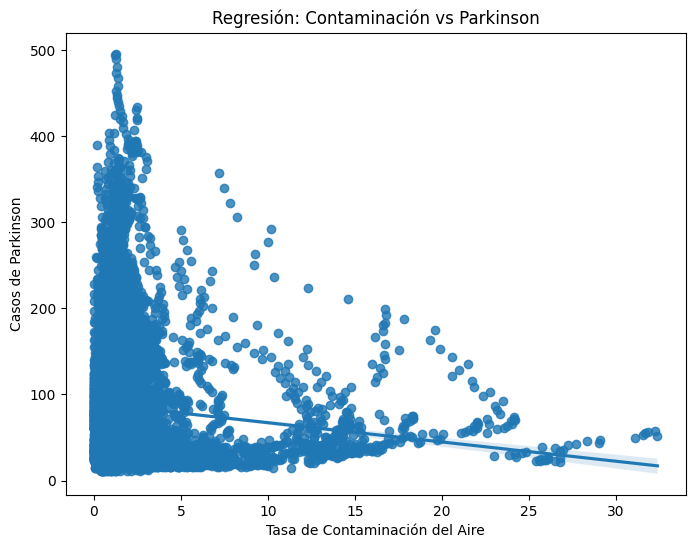

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_contaminacion = pd.read_csv("Datos_contaminación_aire.csv")  

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_contaminacion, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Contaminacion_aire'], y=df_relacion['Parkinson'])
plt.xlabel("Tasa de Contaminación del Aire")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()






### Parkinson y  muertes atribuidas a fuentes de agua inseguras, calidad de agua

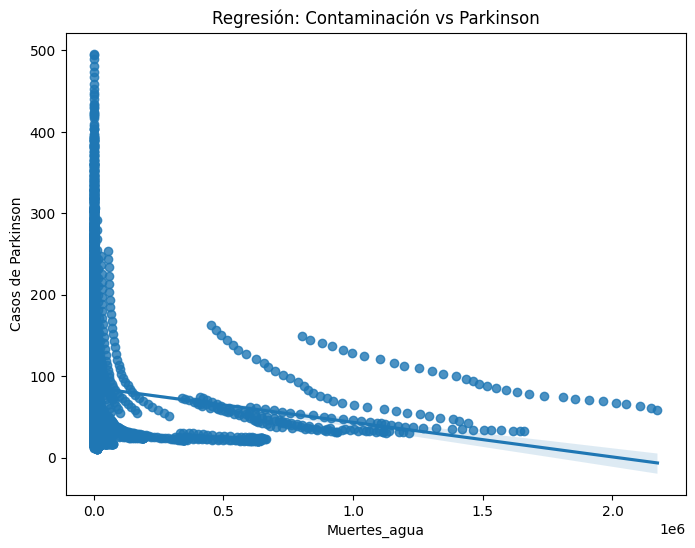

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_calidad_agua = pd.read_csv("Datos_muertes_agua.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_calidad_agua, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Muertes_agua'], y=df_relacion['Parkinson'])
plt.xlabel("Muertes_agua")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()



### Parkinson y  exposición al plomo

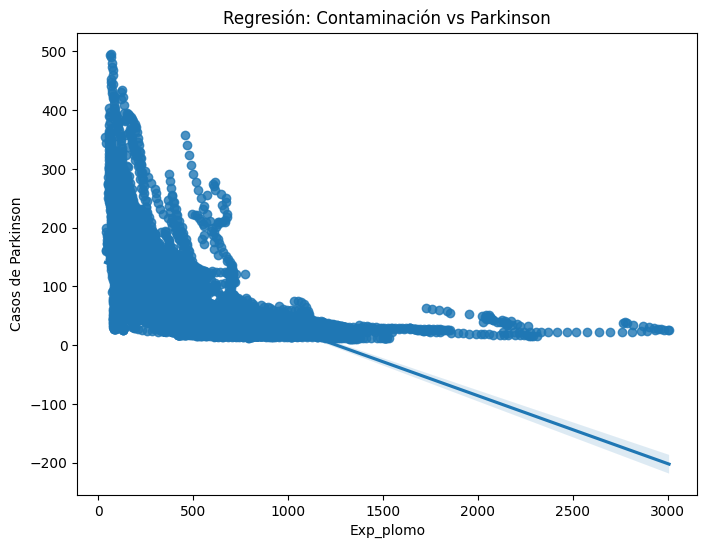

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_plomo = pd.read_csv("Datos_exp_plomo.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_plomo, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Exp_plomo'], y=df_relacion['Parkinson'])
plt.xlabel("Exp_plomo")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()


### Parkinson y uso de pepticidas

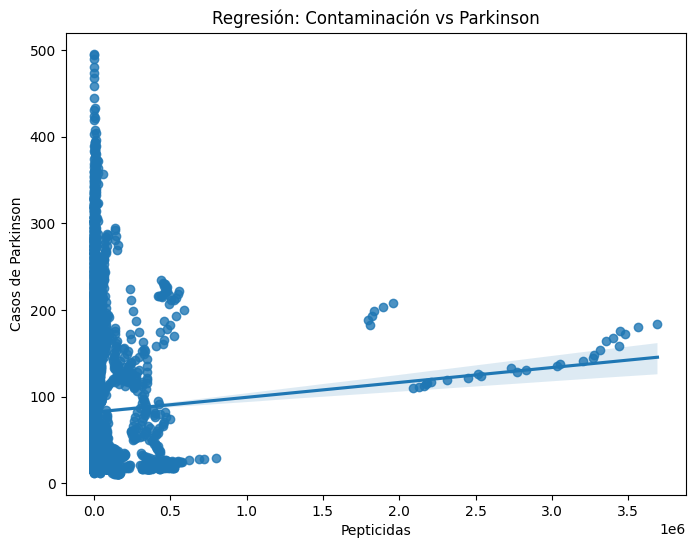

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_pesticidas = pd.read_csv("Datos_uso_pepticidas.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_pesticidas, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Pepticidas'], y=df_relacion['Parkinson'])
plt.xlabel("Pepticidas")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()

### Parkinson y la cantidad de precipitaciones

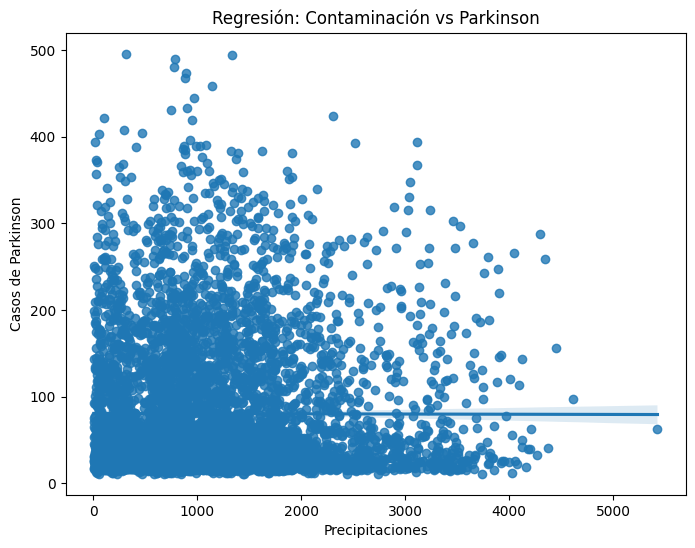

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_precipitaciones = pd.read_csv("Datos_precipitaciones.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_precipitaciones, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Precipitaciones'], y=df_relacion['Parkinson'])
plt.xlabel("Precipitaciones")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()

**MODELOS GLM**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

def entrenar_modelo_glm(df, modelo_familia, variables_independientes, variable_dependiente, test_size=0.2, scaler=False):
    # Definir las variables independientes (X) y dependiente (y)
    X = df[variables_independientes]
    y = df[variable_dependiente]

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Escalar las variables si es necesario
    if scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Añadir constante para el término de intercepto en la regresión
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Crear y entrenar el modelo GLM con la familia elegida
    modelo = sm.GLM(y_train, X_train, family=modelo_familia).fit()

    # Mostrar los resultados del modelo
    print(modelo.summary())

    # Realizar predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo con el Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Error Cuadrático Medio (RMSE): {rmse}')

    # Evaluar el modelo con el Error Absoluto Medio (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Error Absoluto Medio (MAE): {mae}')

    return modelo, rmse, mae

# Ejemplo de uso:

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Definir las variables
variables_independientes = ['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']
variable_dependiente = 'Parkinson'


**Regresión de Poisson**

In [15]:
# Para el modelo Poisson
print("\nModelo Poisson:")
modelo_poisson, rmse_poisson, mae_poisson = entrenar_modelo_glm(df, sm.families.Poisson(), variables_independientes, variable_dependiente)




Modelo Poisson:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4317
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67863.
Date:                Fri, 28 Mar 2025   Deviance:                   1.1042e+05
Time:                        12:15:43   Pearson chi2:                 1.57e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

In [16]:
# Cargar datos
df = pd.read_csv("Tabla_modelos.csv")

# Calcular la media y la varianza de la variable dependiente 'Parkinson'
media = df['Parkinson'].mean()
varianza = df['Parkinson'].var()

# Mostrar los resultados
print(f"Media de Parkinson: {media}")
print(f"Varianza de Parkinson: {varianza}")


Media de Parkinson: 82.66661146178757
Varianza de Parkinson: 6361.589293332272


**Regresion binomial negativa**

In [17]:
# Para el modelo Binomial Negativo
print("\nModelo Binomial Negativo:")
modelo_binom_neg, rmse_binom_neg, mae_binom_neg = entrenar_modelo_glm(df, sm.families.NegativeBinomial(), variables_independientes, variable_dependiente)



Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4317
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22604.
Date:                Fri, 28 Mar 2025   Deviance:                       1772.9
Time:                        12:15:48   Pearson chi2:                 2.49e+03
No. Iterations:                    32   Pseudo R-squ. (CS):             0.3191
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const    

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mi_data = pd.read_csv("Tabla_modelos.csv")

# Ajustar modelo Cuasi-Poisson
modelo_cuasi_poisson = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                               data=mi_data, 
                               family=sm.families.Poisson()).fit(cov_type='HC0')

# Resumen del modelo
print(modelo_cuasi_poisson.summary())

# Ajustar modelo Poisson normal para comparar
modelo_poisson = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                         data=mi_data, 
                         family=sm.families.Poisson()).fit()

# Comparar log-verosimilitud de los modelos
print("Log-Likelihood Poisson:", modelo_poisson.llf)
print("Log-Likelihood Cuasi-Poisson:", modelo_cuasi_poisson.llf)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 5404
Model:                            GLM   Df Residuals:                     5398
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84637.
Date:                Fri, 28 Mar 2025   Deviance:                   1.3763e+05
Time:                        12:15:50   Pearson chi2:                 1.97e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4165      0

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar modelo Binomial Negativa
modelo_binom_neg = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                           data=mi_data, 
                           family=sm.families.NegativeBinomial()).fit()

# Resumen del modelo
print(modelo_binom_neg.summary())

# Comparar log-verosimilitud de los modelos
print("Log-Likelihood Cuassi-Poisson:", modelo_cuasi_poisson.llf)
print("Log-Likelihood Binomial Negativa:", modelo_binom_neg.llf)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 5404
Model:                            GLM   Df Residuals:                     5398
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28276.
Date:                Fri, 28 Mar 2025   Deviance:                       2224.4
Time:                        12:15:50   Pearson chi2:                 3.11e+03
No. Iterations:                    32   Pseudo R-squ. (CS):             0.3139
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0235      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


**Cuasi-possion**

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Definir variables predictoras y variable respuesta
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Agregar una constante para la regresión
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo cuasi-Poisson
model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con métricas comunes
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print(model.summary())
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4317
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67863.
Date:                Fri, 28 Mar 2025   Deviance:                   1.1042e+05
Time:                        12:16:11   Pearson chi2:                 1.57e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4171      0

**GAMMA**

In [15]:
# Para el modelo Gamma
print("\nModelo Gamma:")
modelo_gamma, rmse_gamma, mae_gamma = entrenar_modelo_glm(df, sm.families.Gamma(), variables_independientes, variable_dependiente)



Modelo Gamma:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4317
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                         0.39267
Method:                          IRLS   Log-Likelihood:                -21056.
Date:                Thu, 27 Mar 2025   Deviance:                       1274.8
Time:                        17:22:13   Pearson chi2:                 1.70e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const            

C:\Users\Lorena\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Lorena\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


## RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


df = pd.read_csv("Tabla_modelos.csv")
# Suponiendo que tienes un DataFrame llamado df con las columnas y variables necesarias
X = df[['Contaminacion_aire', 'Muertes_agua','Exp_plomo','Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 10.56024201011885
RMSE: 20.49721811989335


Un MAE bajo indica un modelo con un buen ajuste en términos de predicción promedio, mientras que un MAE alto indica que, en promedio, las predicciones están alejadas del valor real.


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Cargar datos
df = pd.read_csv("Tabla_modelos.csv")

# Selección de las características y la variable dependiente
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (aunque RandomForest no es tan sensible a esto, puede ayudar si hay gran diferencia en rangos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Random Forest con ajuste de hiperparámetros
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, min_samples_split=5, 
                                 min_samples_leaf=5, random_state=42)

# Ajustar el modelo
rf_model.fit(X_train_scaled, y_train)

# Evaluación con validación cruzada (cross-validation)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)  # Convertir MSE a RMSE
print(f"Mean CV RMSE: {np.mean(cv_rmse)}")

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir métricas
print(f"MAE en conjunto de prueba: {mae}")
print(f"RMSE en conjunto de prueba: {rmse}")

# Importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nImportancia de las características:")
for i in range(len(indices)):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")


Mean CV RMSE: 26.199116865354547
MAE en conjunto de prueba: 13.235405372363688
RMSE en conjunto de prueba: 24.154873032637862

Importancia de las características:
Exp_plomo: 0.6396725125641215
Muertes_agua: 0.1943751573211588
Pepticidas: 0.08642314235362313
Contaminacion_aire: 0.07505825677255856
Precipitaciones: 0.004470930988537993


## 4. Support Vector Machines (SVM) para regresión (SVR)

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (SVM suele ser sensible a la escala de los datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo SVR
svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Imprimir resultados
print(f"MAE SVR: {mae_svr}")
print(f"RMSE SVR: {rmse_svr}")


MAE SVR: 27.86587006062093
RMSE SVR: 46.042861675821975


## K-Nearest Neighbors (KNN) Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (KNN es sensible a la escala de los datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar el modelo
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Imprimir resultados
print(f"MAE KNN: {mae_knn}")
print(f"RMSE KNN: {rmse_knn}")


MAE KNN: 29.998274890194267
RMSE KNN: 47.240118118305475


## REDES NEURONALES (perceptrón multicapa (MLP))

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Paso 2: Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']  # Variable a predecir

# Paso 3: Estandarizar las características (importante para redes neuronales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo de regresión (MLPRegressor)
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', max_iter=1000, random_state=42)

# Paso 6: Entrenar el modelo
model.fit(X_train, y_train)

# Paso 7: Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Pérdida en el conjunto de prueba (MSE): {mse}")

# Paso 8: Hacer predicciones
print(f"Primeras 5 predicciones: {y_pred[:5]}")


Pérdida en el conjunto de prueba (MSE): 1595.2338790904278
Primeras 5 predicciones: [189.2252809   63.67152739  29.33453779  22.4104096   33.59296445]


## XGBoost

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Crear el modelo
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")


Fitting 3 folds for each of 3750 candidates, totalling 11250 fits
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=1

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_est

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=1

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimator

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimato

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estima

Pérdida en el conjunto de prueba (MSE): 336.24550202008965


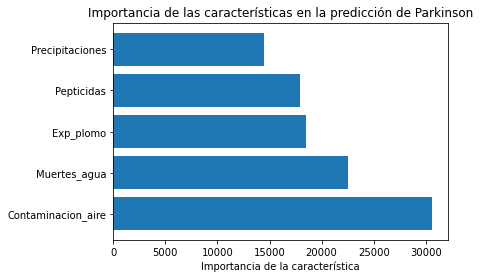

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [334.64896   34.325424  29.120407  23.977303  31.697712]


In [72]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBRegressor
model = xgb.XGBRegressor(n_estimators=500, max_depth=9, learning_rate=0.05, subsample=0.7, colsample_bytree=1.0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la pérdida (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Pérdida en el conjunto de prueba (MSE): {mse}')

# Obtener las importancias de las características
importances = model.get_booster().get_score(importance_type='weight')  # 'weight' también puede ser 'gain' o 'cover'

# Ordenar las importancias en orden descendente
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Visualizar las importancias
features = [x[0] for x in importances_sorted]
scores = [x[1] for x in importances_sorted]

plt.barh(features, scores)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de Parkinson')
plt.show()

# Primeras 5 predicciones comparadas con los valores reales
print("Valores reales:", y_test.head().values)
print("Primeras 5 predicciones:", y_pred[:5])



Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300,

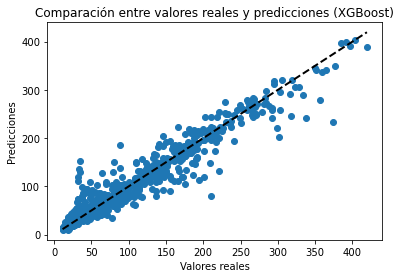

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [340.40558   38.22928   28.95657   25.680815  28.529   ]


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Paso 2: Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']  # Variable dependiente cuantitativa

# Paso 3: Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo de XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Paso 6: Ajustar hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

# Paso 7: Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Paso 8: Evaluar el modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Pérdida en el conjunto de prueba (MSE): {mse}")

# Paso 9: Gráfico para comparar las predicciones con los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones (XGBoost)')
plt.show()

# Paso 10: Primeras 5 predicciones
# Comparar las primeras 5 predicciones con los valores reales
print("Valores reales:", y_test[:5].values)
print("Primeras 5 predicciones:", y_pred[:5])




Pérdida en el conjunto de prueba (MSE): 382.97596097286777


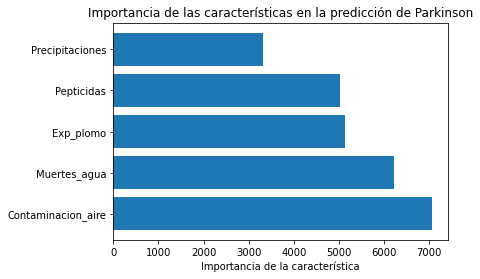

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [332.56342   26.267563  29.165243  23.864243  38.776764]


In [69]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBRegressor
model = xgb.XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la pérdida (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Pérdida en el conjunto de prueba (MSE): {mse}')

# Obtener las importancias de las características
importances = model.get_booster().get_score(importance_type='weight')  # 'weight' también puede ser 'gain' o 'cover'

# Ordenar las importancias en orden descendente
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Visualizar las importancias
features = [x[0] for x in importances_sorted]
scores = [x[1] for x in importances_sorted]

plt.barh(features, scores)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de Parkinson')
plt.show()

# Primeras 5 predicciones comparadas con los valores reales
print("Valores reales:", y_test.head().values)
print("Primeras 5 predicciones:", y_pred[:5])


